In [2]:
!ls sketchrnn/

'aircraft carrier.full.npz'   lightning.npz
'aircraft carrier.npz'	      line.full.npz
 airplane.full.npz	      line.npz
 airplane.npz		      lion.full.npz
'alarm clock.full.npz'	      lion.npz
'alarm clock.npz'	      lipstick.full.npz
 ambulance.full.npz	      lipstick.npz
 ambulance.npz		      lobster.full.npz
 angel.full.npz		      lobster.npz
 angel.npz		      lollipop.full.npz
'animal migration.full.npz'   lollipop.npz
'animal migration.npz'	      mailbox.full.npz
 ant.full.npz		      mailbox.npz
 ant.npz		      map.full.npz
 anvil.full.npz		      map.npz
 anvil.npz		      marker.full.npz
 apple.full.npz		      marker.npz
 apple.npz		      matches.full.npz
 arm.full.npz		      matches.npz
 arm.npz		      megaphone.full.npz
 asparagus.full.npz	      megaphone.npz
 asparagus.npz		      mermaid.full.npz
 axe.full.npz		      mermaid.npz
 axe.npz		      microphone.full.npz
 backpack.full.npz	      microphone.npz
 backpack.npz		      microwave.full.npz
 banana.full.npz	      microwave.n

In [6]:
import numpy as np

In [18]:
import numpy as np
import random

# libraries required for visualisation:
from IPython.display import SVG, display
import svgwrite
# conda install -c omnia svgwrite=1.1.6 if you don't have this lib

# helper function for draw_strokes
def get_bounds(data, factor):
  min_x = 0
  max_x = 0
  min_y = 0
  max_y = 0
    
  abs_x = 0
  abs_y = 0
  for i in range(len(data)):
    x = float(data[i,0])/factor
    y = float(data[i,1])/factor
    abs_x += x
    abs_y += y
    min_x = min(min_x, abs_x)
    min_y = min(min_y, abs_y)
    max_x = max(max_x, abs_x)
    max_y = max(max_y, abs_y)
    
  return (min_x, max_x, min_y, max_y)

# little function that displays vector images and saves them to .svg
def draw_strokes(data, factor=0.2, svg_filename = 'sample.svg'):
  min_x, max_x, min_y, max_y = get_bounds(data, factor)
  dims = (50 + max_x - min_x, 50 + max_y - min_y)
  dwg = svgwrite.Drawing(svg_filename, size=dims)
  dwg.add(dwg.rect(insert=(0, 0), size=dims,fill='white'))
  lift_pen = 1
  abs_x = 25 - min_x 
  abs_y = 25 - min_y
  p = "M%s,%s " % (abs_x, abs_y)
  command = "m"
  for i in range(len(data)):
    if (lift_pen == 1):
      command = "m"
    elif (command != "l"):
      command = "l"
    else:
      command = ""
    x = float(data[i,0])/factor
    y = float(data[i,1])/factor
    lift_pen = data[i, 2]
    p += command+str(x)+","+str(y)+" "
  the_color = "black"
  stroke_width = 1
  dwg.add(dwg.path(p).stroke(the_color,stroke_width).fill("none"))
  dwg.save()
  display(SVG(dwg.tostring()))

# generate a 2D grid of many vector drawings
def make_grid_svg(s_list, grid_space=10.0, grid_space_x=15.0):
  def get_start_and_end(x):
    x = np.array(x)
    x = x[:, 0:2]
    x_start = x[0]
    x_end = x.sum(axis=0)
    x = x.cumsum(axis=0)
    x_max = x.max(axis=0)
    x_min = x.min(axis=0)
    center_loc = (x_max+x_min)*0.5
    return x_start-center_loc, x_end
  x_pos = 0.0
  y_pos = 0.0
  result = [[x_pos, y_pos, 1]]
  for sample in s_list:
    s = sample[0]
    grid_loc = sample[1]
    grid_y = grid_loc[0]*grid_space+grid_space*0.5
    grid_x = grid_loc[1]*grid_space_x+grid_space_x*0.5
    start_loc, delta_pos = get_start_and_end(s)

    loc_x = start_loc[0]
    loc_y = start_loc[1]
    new_x_pos = grid_x+loc_x
    new_y_pos = grid_y+loc_y
    result.append([new_x_pos-x_pos, new_y_pos-y_pos, 0])

    result += s.tolist()
    result[-1][2] = 1
    x_pos = new_x_pos+delta_pos[0]
    y_pos = new_y_pos+delta_pos[1]
  return np.array(result)


70000
2500
2500


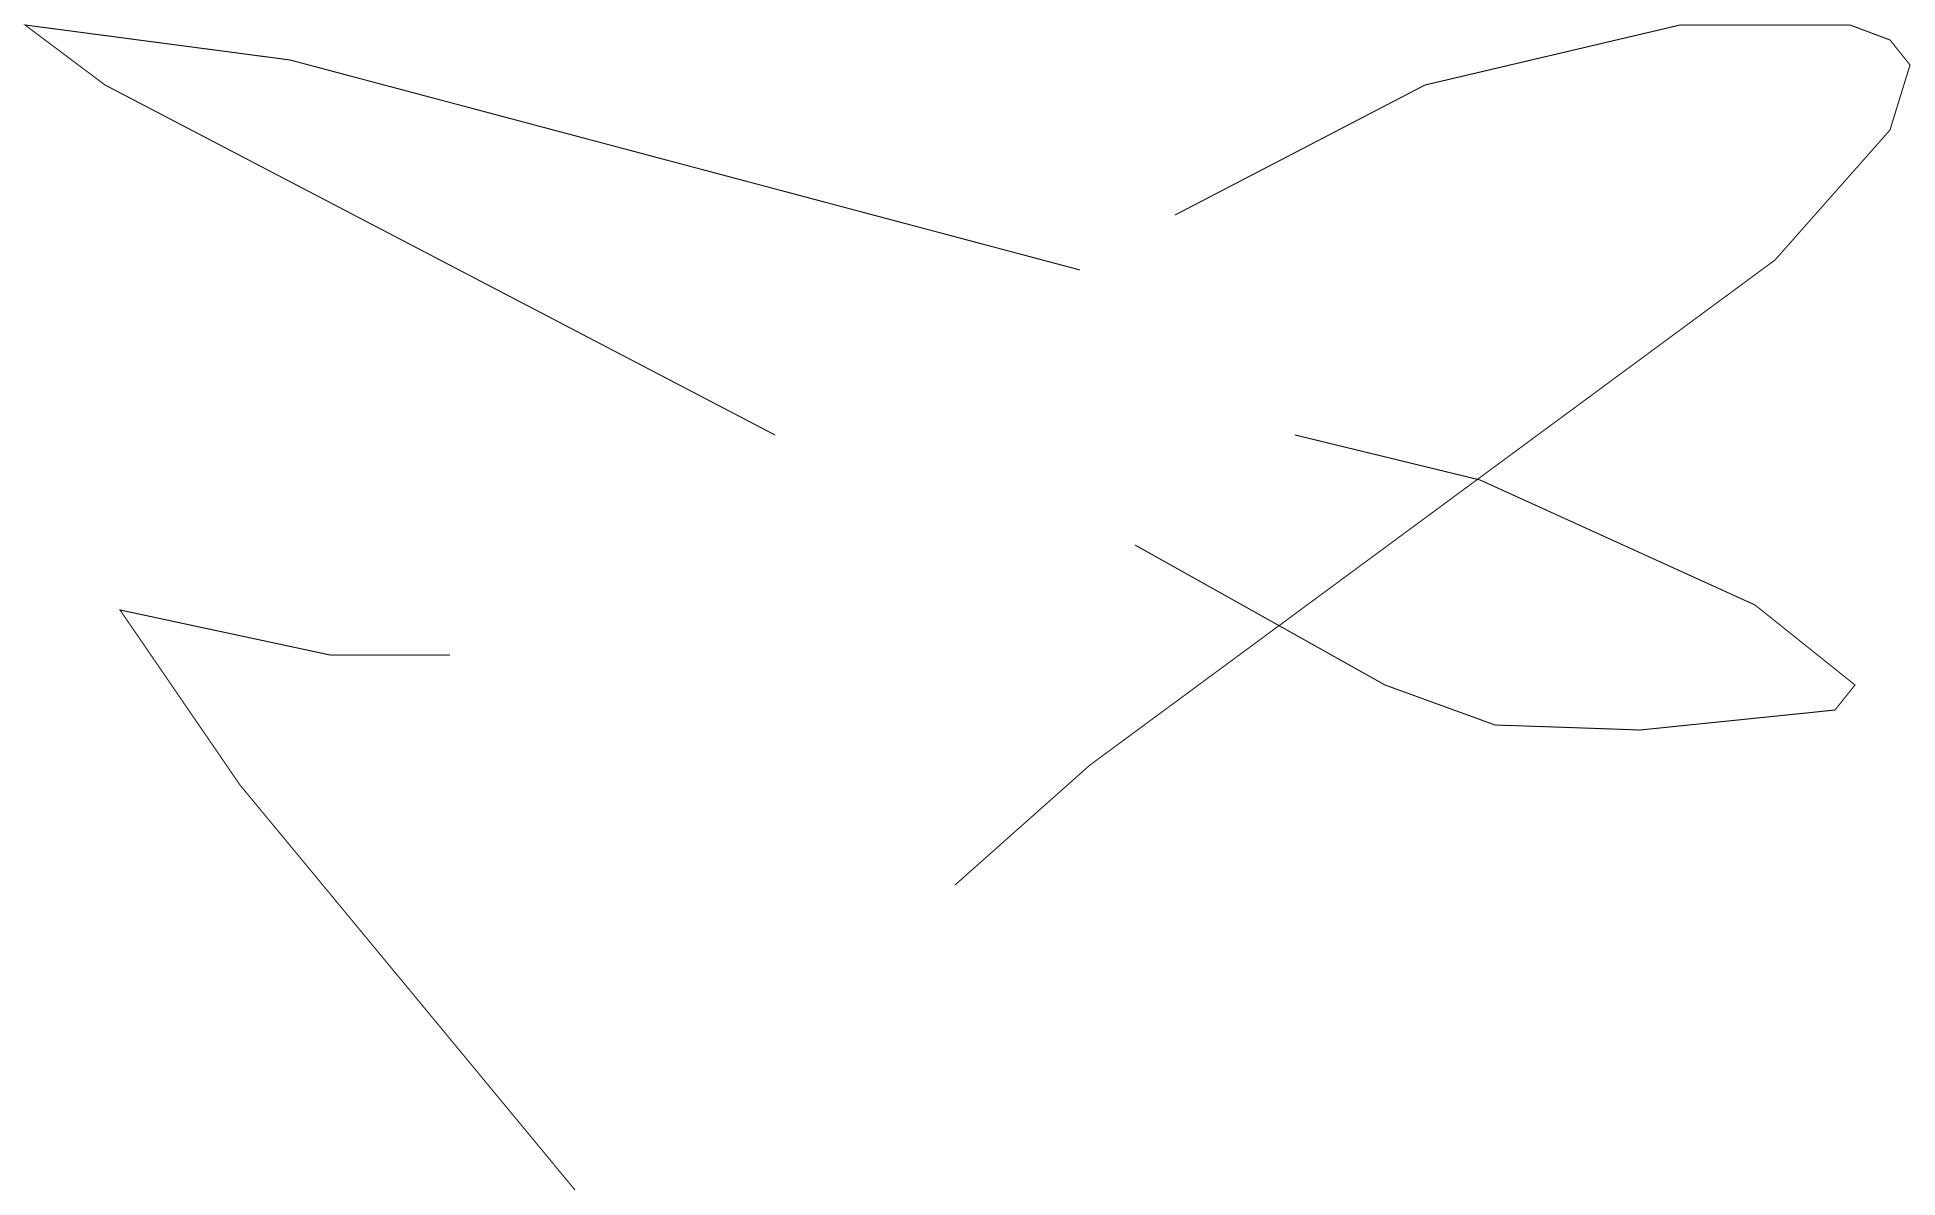

In [19]:
filename = "sketchrnn/airplane.npz"
load_data = np.load(filename, allow_pickle=True,encoding='bytes')
train_set = load_data['train']
valid_set = load_data['valid']
test_set = load_data['test']

print(len(train_set))
  
print(len(valid_set))

print(len(test_set))

  
# draw a random example (see draw_strokes.py)
draw_strokes(random.choice(train_set))

In [10]:
load_data

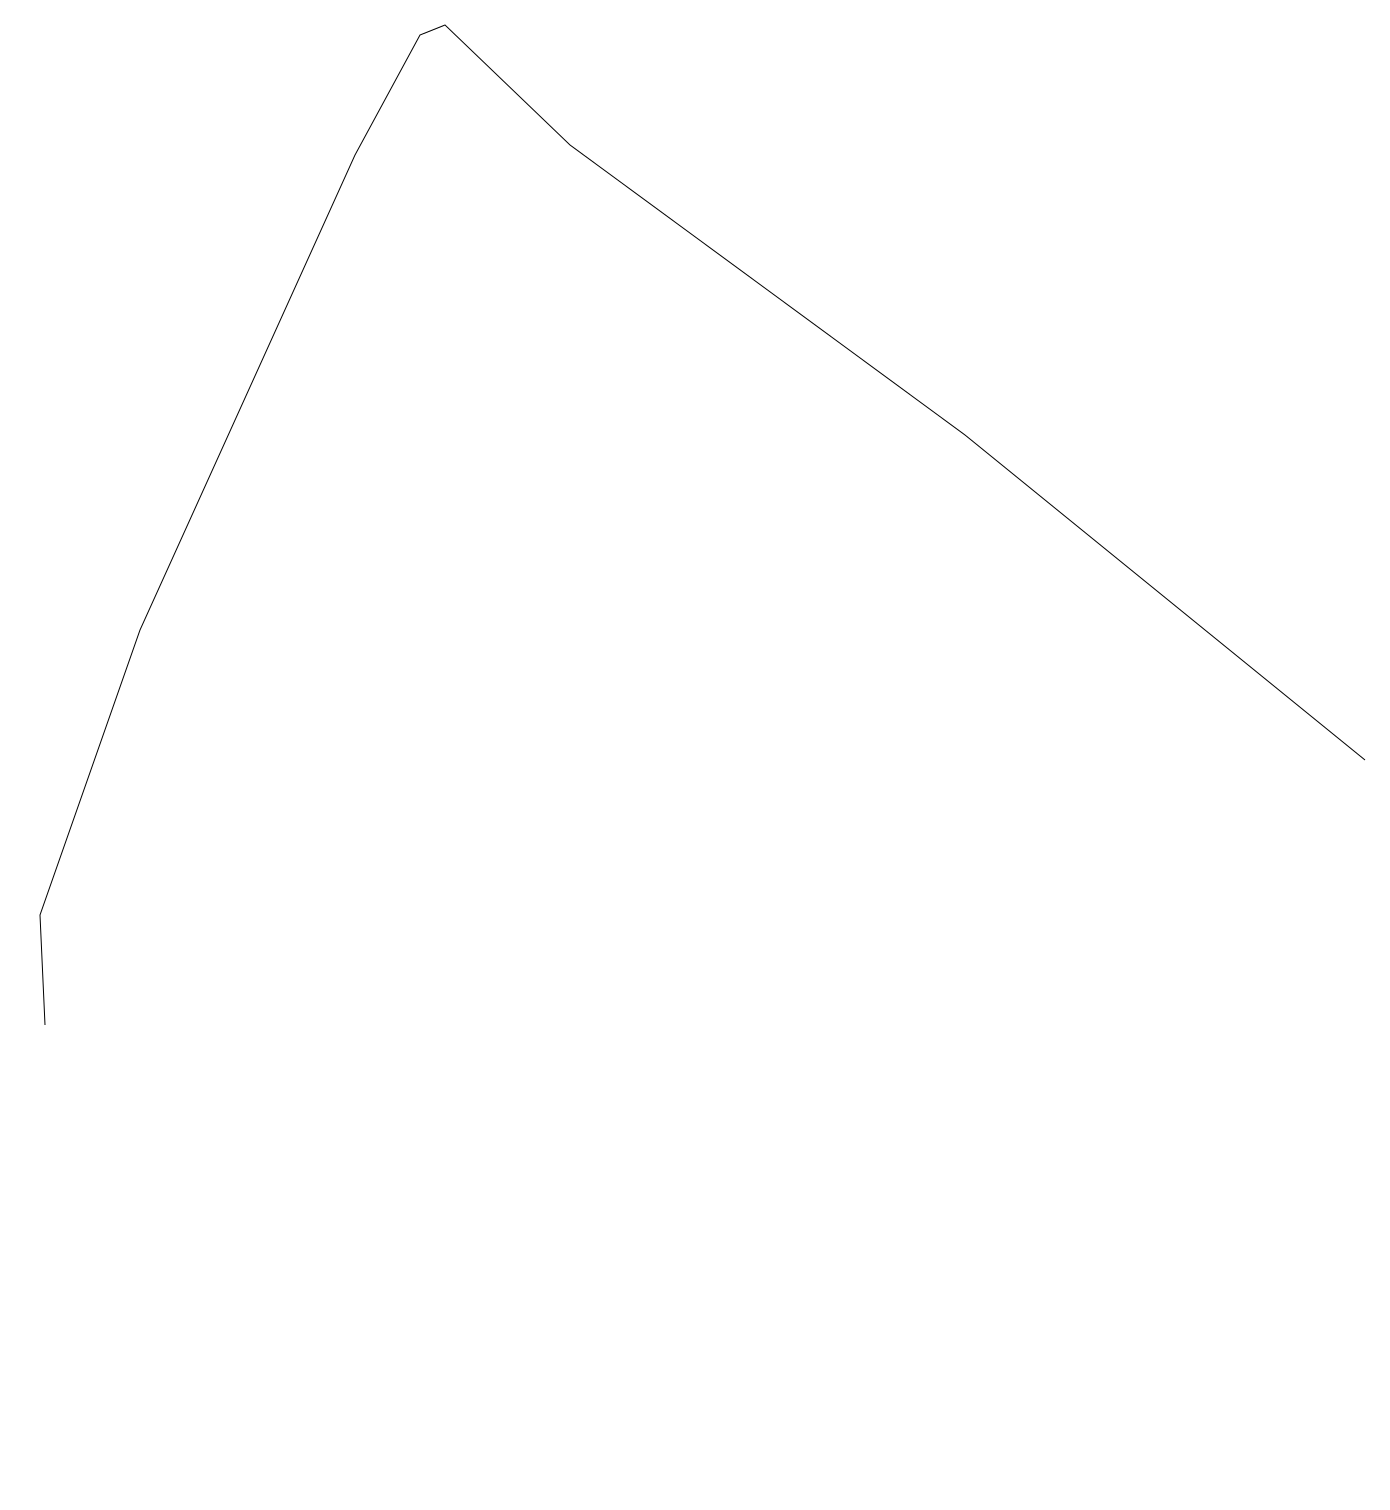

In [86]:
draw_strokes(train_set[1][38:48])
# draw_strokes(train_set[1])

In [23]:
train_set[1].shape

(56, 3)

In [24]:
train_set[1].equals(0,axis=2)

AttributeError: 'numpy.ndarray' object has no attribute 'equals'

In [28]:
np.where(train_set[:,:,], 1)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [45]:
train_set[1].nonzero?

Object `nonzero` not found.


In [84]:
train_set[1][46:56]

array([[  80,   65,    1],
       [-222,  145,    0],
       [  22,    5,    0],
       [  58,   29,    0],
       [  97,   42,    0],
       [  49,   12,    0],
       [   4,  -10,    0],
       [  -8, -122,    0],
       [   0,  -49,    0],
       [  -3,  -16,    1]], dtype=int16)

In [80]:
np.nonzero(train_set[1][:,2])

(array([37, 46, 55]),)